# Gestión de nulos

Nulos a tratar:
- **age** -> Tiene 11.90% de nulos. Los gestionaria sustituyéndolos por la mediana. Cambiar de tipo float64 a tipo int64.
- **job** -> Tiene 0.80% de nulos.
- **marital** -> Tiene 0.19% de nulos.
- **education** -> Tiene 4.20% de nulos.
- **cons_price_idx** -> Tiene 1.09% de nulos.
- **euribor3m** -> Tiene 21.52% de nulos.
- **date** -> Tiene 0.57% nulos.

In [23]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Exploracion de archivos
import sys
sys.path.append('../')

#Estadisticos avanzados
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

#Funciones personalizadas
from src import soporte_visualizacion as spv 

In [24]:
df_o = pd.read_csv('../data/processed/01.data_limpios.csv', index_col=0, parse_dates=['date'])

In [25]:
df = df_o.copy()

In [26]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,date,id,contact_month,contact_year
14252,32.0,unemployed,married,high_school,unknown,Yes,No,cellular,38,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,False,2019-07-23,0b3c9500-1cec-430b-97b5-eee45df9c558,july,2019.0
8053,48.0,technician,divorced,professional_course,No,No,No,telephone,204,5,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,False,2019-11-17,3545fa97-dd5a-490f-bf0c-54940a87a80a,november,2019.0
27412,33.0,admin,married,university_degree,No,Yes,No,telephone,148,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,False,2018-11-13,7f68d1ec-f72b-4042-938b-73bdddf7e642,november,2018.0
19626,NaN,unemployed,married,professional_course,unknown,No,No,cellular,105,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,False,2018-10-23,32ce8044-8112-4eda-b7f8-ea092bd5a26a,october,2018.0
40867,32.0,technician,married,professional_course,No,No,No,cellular,486,1,999,0,nonexistent,-1.1,94.601,-49.5,0.959,4963.6,True,2018-06-14,8ab9d291-24ec-4bcb-a0f3-0a9992e8b79a,june,2018.0
30558,52.0,admin,married,university_degree,No,No,Yes,cellular,434,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,False,2019-02-15,cb3d7715-1e4c-4aed-a997-200cb7c4af61,february,2019.0
14552,40.0,admin,married,university_degree,No,Yes,No,cellular,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,False,2017-01-11,1fe5daa9-82c6-494f-bfcd-689192a501a7,january,2017.0
31747,36.0,blue-collar,married,basic_9y,No,No,No,cellular,147,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,False,2019-09-18,1b25a9a8-1deb-40d5-a971-db3d597460b5,september,2019.0
30184,31.0,admin,single,high_school,No,No,No,cellular,252,1,5,1,success,-1.8,93.075,-47.1,1.365,5099.1,True,2019-02-25,773f3fd7-2891-4f0e-afde-6ddb5df0d8c7,february,2019.0
401,NaN,services,married,high_school,unknown,unknown,unknown,telephone,152,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,2017-08-11,e0596439-698d-49c7-896d-659ad0762e48,august,2017.0


In [27]:
((df.isnull().sum() / df.shape[0])*100).round(3).sort_values(ascending=False)

euribor3m         21.526
age               11.907
education          4.202
cons_price_idx     1.095
job                0.802
contact_month      0.577
contact_year       0.577
date               0.577
marital            0.198
default            0.000
housing            0.000
loan               0.000
contact            0.000
campaign           0.000
duration           0.000
emp_var_rate       0.000
poutcome           0.000
previous           0.000
pdays              0.000
y                  0.000
nr_employed        0.000
cons_conf_idx      0.000
id                 0.000
dtype: float64

## Nulos Columnas Categóricas

In [28]:
col_cat_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include='O').columns

for col in col_cat_nulos:
    print(col.upper())

    # % de nulos
    pct_nulos = (df[col].isnull().mean() * 100).round(2)
    print(f"Porcentaje de nulos: {pct_nulos}%\n")

    # Distribución de categorías (excluyendo nulos)
    display((df[col].value_counts(normalize=True) * 100).round(2))

    print('--------')

JOB
Porcentaje de nulos: 0.8%



job
admin            25.49
blue-collar      22.63
technician       16.47
services          9.76
management        7.15
retired           4.20
entrepreneur      3.57
self-employed     3.49
housemaid         2.63
unemployed        2.49
student           2.12
Name: proportion, dtype: float64

--------
MARITAL
Porcentaje de nulos: 0.2%



marital
married     60.58
single      28.21
divorced    11.21
Name: proportion, dtype: float64

--------
EDUCATION
Porcentaje de nulos: 4.2%



education
university_degree      30.88
high_school            24.09
basic_9y               15.32
professional_course    13.30
basic_4y               10.57
basic_6y                5.79
illiterate              0.04
Name: proportion, dtype: float64

--------
CONTACT_MONTH
Porcentaje de nulos: 0.58%



contact_month
november     8.43
october      8.42
july         8.40
march        8.39
april        8.38
february     8.37
september    8.35
may          8.30
june         8.28
august       8.25
january      8.23
december     8.21
Name: proportion, dtype: float64

--------


Las variables categóricas con valores nulos no presentan una relación directa entre sí y el porcentaje de valores ausentes es bajo (< 5%). Con el análisis de frecuencias es suficiente para decidir imputar los valores nulos con la categoría 'unknown'.

In [29]:
df[col_cat_nulos] = df[col_cat_nulos].fillna('unknown')

In [30]:
((df.isnull().sum() / df.shape[0])*100).round(3).sort_values(ascending=False)

euribor3m         21.526
age               11.907
cons_price_idx     1.095
contact_year       0.577
date               0.577
job                0.000
marital            0.000
loan               0.000
housing            0.000
default            0.000
education          0.000
pdays              0.000
contact            0.000
campaign           0.000
duration           0.000
emp_var_rate       0.000
poutcome           0.000
previous           0.000
cons_conf_idx      0.000
y                  0.000
nr_employed        0.000
id                 0.000
contact_month      0.000
dtype: float64

## Nulos Columnas Numéricas
Visualización de variables numéricas para detección de outliers y apoyo a la imputación de valores nulos.

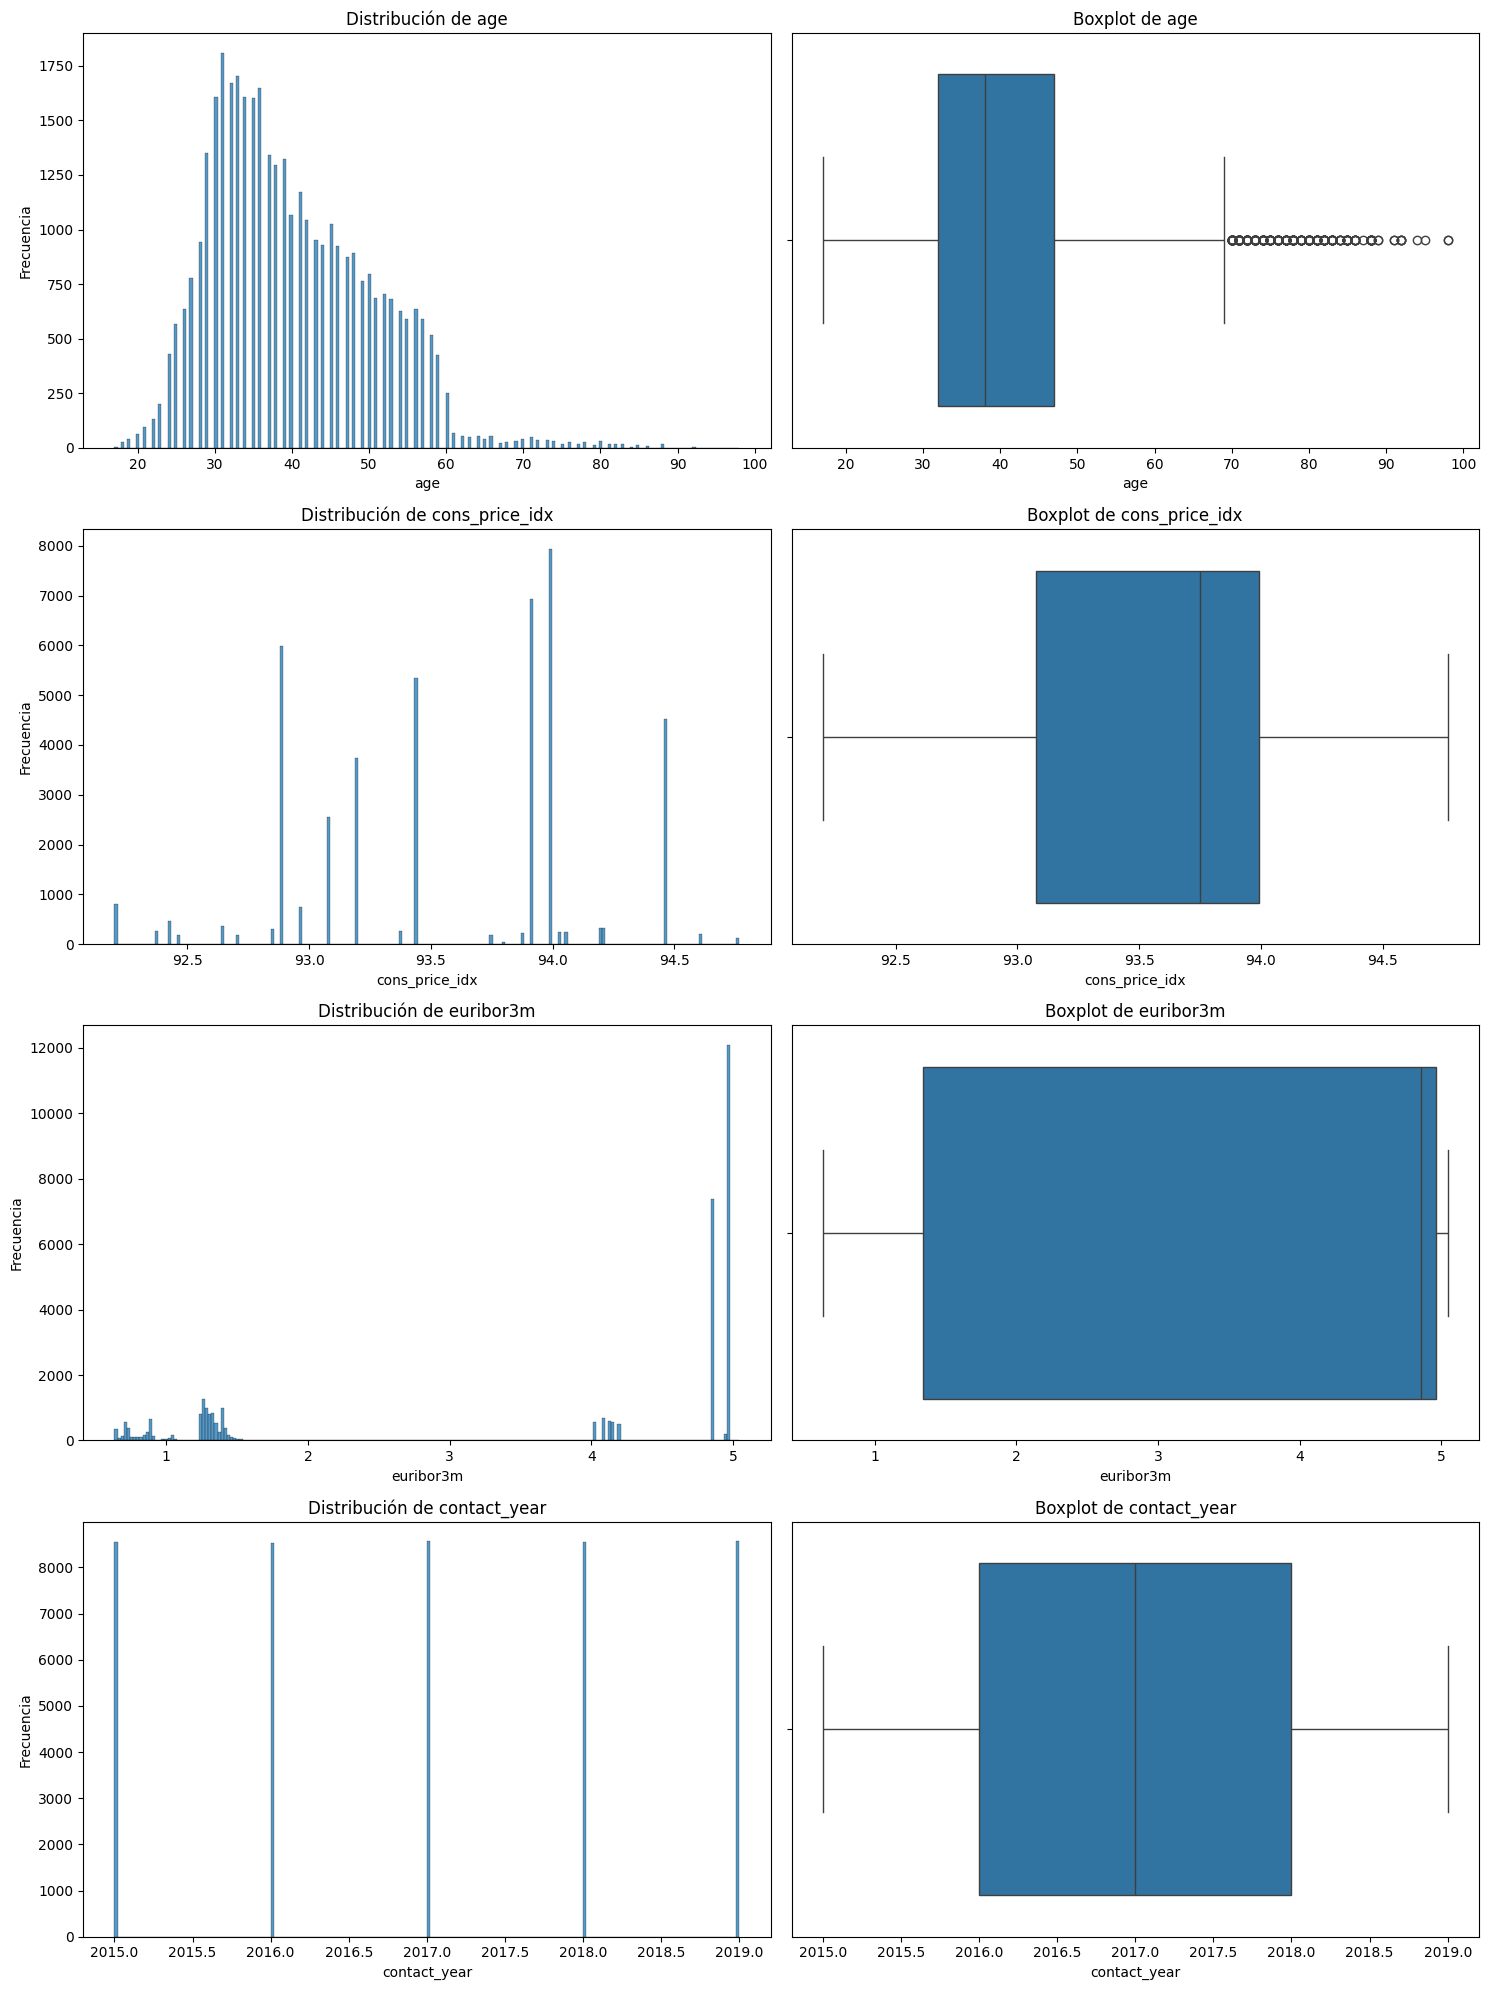

In [31]:
spv.visualizar_numericas_nulos(df)

## Columnas numéricas con nulos y Outliers:
- age

In [32]:
def calculo_outliers (df,cols):
    for col in cols:
        q_75 = df[col].quantile(0.75)
        q_25 = df[col].quantile(0.25)
        rango_itq = q_75 - q_25
        inferior = q_25 - (rango_itq*1.5)
        superior = q_75 + (rango_itq*1.5)
        outliers = df[(df[col] < inferior) | (df[col] > superior)]
        num_outliers = len(outliers)
        per_outliers = num_outliers/df.shape[0]*100
        
        print(f'En la columna {col.upper()} tenemos un total de {num_outliers} outliers, lo que representa un {per_outliers:.2f}% del total')

In [33]:
calculo_outliers(df,['age'])

En la columna AGE tenemos un total de 441 outliers, lo que representa un 1.03% del total


In [34]:
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
pdays,43000.0,962.330953,0.0,999.0,999.0,999.0,999.0,187.260394
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp_var_rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
cons_price_idx,42529.0,93.574219,92.201,93.075,93.749,93.994,94.767,0.579548
cons_conf_idx,43000.0,-40.509049,-50.8,-42.7,-41.8,-36.4,-26.9,4.637186
euribor3m,33744.0,3.616521,0.634,1.344,4.857,4.961,5.045,1.737117
nr_employed,43000.0,5166.852602,4963.6,5099.1,5191.0,5228.1,5228.1,72.411125


`age` tiene 1.03% de outliers → muy bajo, así que imputaremos los nulos por la mediana que es más robusta.


In [35]:
mediana_age = df['age'].median()
df['age'] = df['age'].fillna(mediana_age).astype(int)

`cons_price_idx` tiene un porcentaje de nulos muy bajo (1.09%) y sin outliers. Lo imputamos con la media por ejemplo (en este caso daría igual media o mediana)

In [36]:
media_cpi = df['cons_price_idx'].mean()
df['cons_price_idx'] = df['cons_price_idx'].fillna(media_cpi)

La columna `euribor3m` tiene un 21.52% de valores nulos y está relacionada con otras variables económicas del dataset. Para mantener la correlación entre variables y obtener una imputación más precisa, vamos a utilizar la Imputación Múltiple (MICE) en lugar de la mediana.

In [37]:
cols_para_imputar = ['euribor3m', 'cons_price_idx', 'cons_conf_idx', 'emp_var_rate', 'nr_employed']
imputer = IterativeImputer(random_state=42)
df[cols_para_imputar] = imputer.fit_transform(df[cols_para_imputar])

## Nulos Columnna date
El porcentaje de nulos en esta columna es muy bajo (0.57%), por lo que la mejor estrategia es la eliminación de esas filas ya que tendría un impacto mínimo. Los nulos en las columnas `contact_month` y `contact_year`también estarían imputados.

In [38]:
df = df.dropna(subset=['date'])

Guardamos el nuevo archivo de conjunto de datos limpio y sin nulos

In [ ]:
df.to_csv('../data/processed/02.data_limpios_no_nulos_bank.csv')